# Community detection - **Igraph**

---------------------------------------------

Installing libraries



In [ ]:
!pip install python-igraph
!pip install cairocffi

     |████████████████████████████████| 3.2MB 10.0MB/s 
     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp36-none-any.whl size=89552 sha256=fd39ca78f153c98bdbda73468b755ccb259335c11cc13a90eb73c8d2ce6f1169
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


In [ ]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.optimize import curve_fit


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating a **graph** from a pandas dataframe

In [ ]:
def get_graph(adj_matfile, neuron_namesfile):
    # import the adjacency matrix from text file
    adjacency = np.loadtxt(adj_matfile,dtype='int')
    print("Shape of adjacency matrix:", adjacency.shape)

    # import names of each neuron
    f = open(neuron_namesfile,"r") #opens file with name of "test.txt"
    neuron_names = []
    for line in f:
        neuron_names.append(line[:-1]) #[:-1] because we don't want /n in the end.  
    #print((neuron_names2))
    n_neurons = len(neuron_names)
    print("Total number of neurons:",n_neurons)
    
    # create node and node attributes which is the name for the graph
    nodes_list = []
    for i in range(len(neuron_names)):
        #node attribute is given by its neuron name
        nodes_list.append((i,{"name":neuron_names[i]}))
    #print(len(nodes_list))

    # creating an edge list from adjacency matrix
    edge_list=[]
    for i in range(len(neuron_names)):
        for j in range(len(neuron_names)):
            if adjacency[i,j]==0: # if there's no weight, let's forget the edge.
                pass
            else:
                edge_list.append( (i,j,{"weight":adjacency[i,j],"Label":"%s - %s"%(neuron_names[i],neuron_names[j])}) )
    # Creating a directed graph from adjacency matrix so that it will be easy to deal using the networkx module

    G = nx.DiGraph()

    # Add all the nodes to the graph
    G.add_nodes_from(nodes_list)
    # Add all the edges to the graph
    G.add_edges_from(edge_list)

    return adjacency, neuron_names, n_neurons, G

In [ ]:
adj, neuron_names, number_neurons, G = get_graph("/content/drive/MyDrive/Network Science/Delfina/adjacency.txt", "/content/drive/MyDrive/Network Science/Delfina/neuron_names.txt")


Shape of adjacency matrix: (3163, 3163)
Total number of neurons: 3163


In [ ]:
G.is_directed()

True

From *networkx* to *igraph*

In [ ]:
%%time 
#usually takes up to 1 hour with CPU 
g = ig.Graph.from_networkx(G)

for vertice in g.vs[0:10]:
    print(vertice.attributes())
for edge in g.es[0:10]:
    print(edge.attributes())

{'_nx_name': 0, 'name': 'T_161121_HuCxBG_8_3'}
{'_nx_name': 1, 'name': 'T_190702_317xBG_13_3'}
{'_nx_name': 2, 'name': '20160928_1013_BGUG_HuC_ltRFP_d7_F3'}
{'_nx_name': 3, 'name': '20161004_1013_BGUG_HuC_ltRFP_d5_F1_Neuron2'}
{'_nx_name': 4, 'name': 'T_191204_1_3'}
{'_nx_name': 5, 'name': 'T_160920_11_1'}
{'_nx_name': 6, 'name': 'T_180111_7_1'}
{'_nx_name': 7, 'name': 'T_191115_3_4'}
{'_nx_name': 8, 'name': 'T_170303_11_1'}
{'_nx_name': 9, 'name': 'T_160607_7_2'}
{'weight': 32, 'Label': 'T_161121_HuCxBG_8_3 - T_161031_4_2'}
{'weight': 35, 'Label': 'T_161121_HuCxBG_8_3 - T_190527_1181xBG_13_1'}
{'weight': 55, 'Label': 'T_161121_HuCxBG_8_3 - T_180102_14_2'}
{'weight': 70, 'Label': 'T_161121_HuCxBG_8_3 - T_161121_HuCxBG_14_2'}
{'weight': 19, 'Label': 'T_161121_HuCxBG_8_3 - T_170714_5_1'}
{'weight': 25, 'Label': 'T_161121_HuCxBG_8_3 - T_190121_3_4'}
{'weight': 9, 'Label': 'T_161121_HuCxBG_8_3 - T_191016_5_2'}
{'weight': 19, 'Label': 'T_161121_HuCxBG_8_3 - T_190527_1181xBG_17_1'}
{'weight'

# Community detection

In [ ]:
def Community_save(Graph, comunidadeds, filename):
  membership = comunidadeds.membership
  df = pd.DataFrame()
  df['Node'] = Graph.vs['_nx_name']
  df['Community'] = membership

  ax = df.hist(column='Community', bins = np.max(df['Community']+1),  grid=False, figsize=(12,8), color='lightseagreen', zorder=1, rwidth=0.9)

  ax = ax[0]
  for x in ax:

      # Despine
      x.spines['right'].set_visible(False)
      x.spines['top'].set_visible(False)
      x.spines['left'].set_visible(False)

      # Switch off ticks
      x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

      # Draw horizontal axis lines
      vals = x.get_yticks()
      for tick in vals:
          x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

      # Remove title
      x.set_title("")

      # Set x-axis label
      x.set_xlabel("Community class", labelpad=20, weight='bold', size=15)

      # Set y-axis label
      x.set_ylabel("Size", labelpad=20, weight='bold', size=15)
    
      x.set_title("Communities using "+filename+" algoritm ",  size=20)


  for c in range(np.max(df['Community']+1)):
    print ("Community = ", c)
    node = []
    member = []
    C = df[df['Community'] == c]
    C = C.reset_index(drop=True)
    comm = pd.DataFrame()
    for j in range(len(C)):
      node.append((C['Node'][j]))
      member.append((C['Community'][j]))

    comm['Node'] = node
    comm['Community'] =  member
    
    comm.to_csv("Data/"+filename+str(c)+".csv", index=False)

In [ ]:
largest = g.clusters().giant()
print(len(largest.vs))

3154


## spinglass

keeping fixed start temp

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22


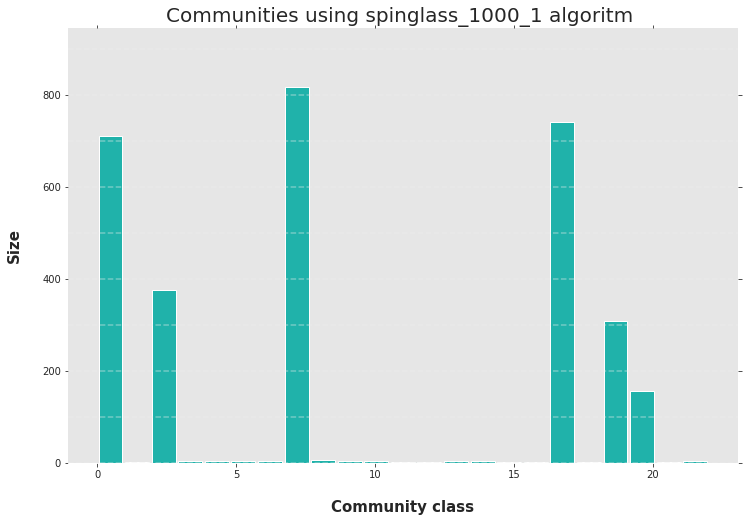

In [ ]:
spinglass_1000_2=largest.community_spinglass(start_temp=1000, stop_temp=2, cool_fact=0.99,)
Community_save(largest, spinglass_1000_2, "spinglass_1000_2")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22


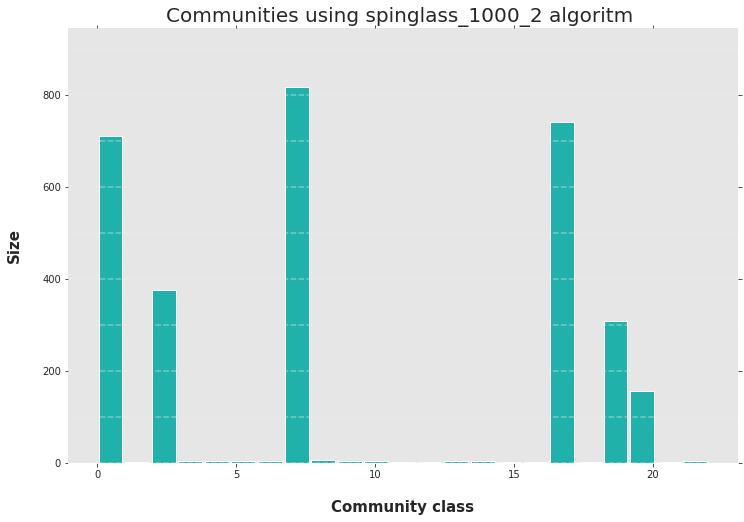

In [ ]:
Community_save(largest, spinglass_1000_2, "spinglass_1000_2")

In [ ]:
spinglass_1000_0=largest.community_spinglass(start_temp=1000, stop_temp=0, cool_fact=0.99,)


Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24


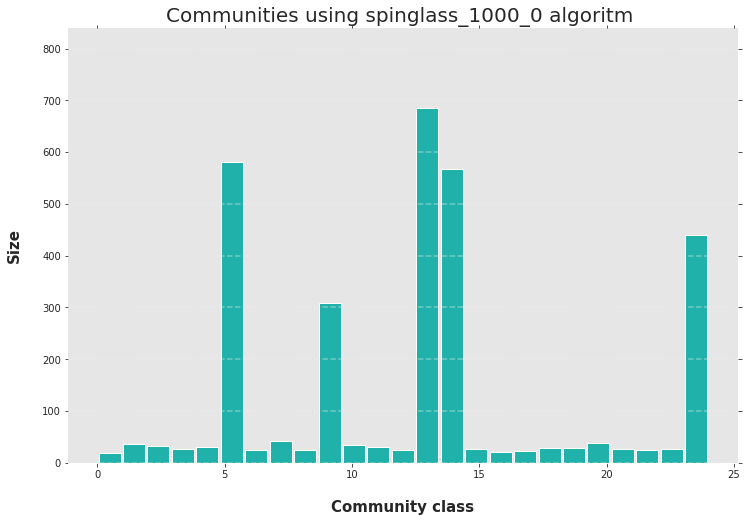

In [ ]:
Community_save(largest, spinglass_1000_10, "spinglass_1000_0")

Community =  0


FileNotFoundError: ignored

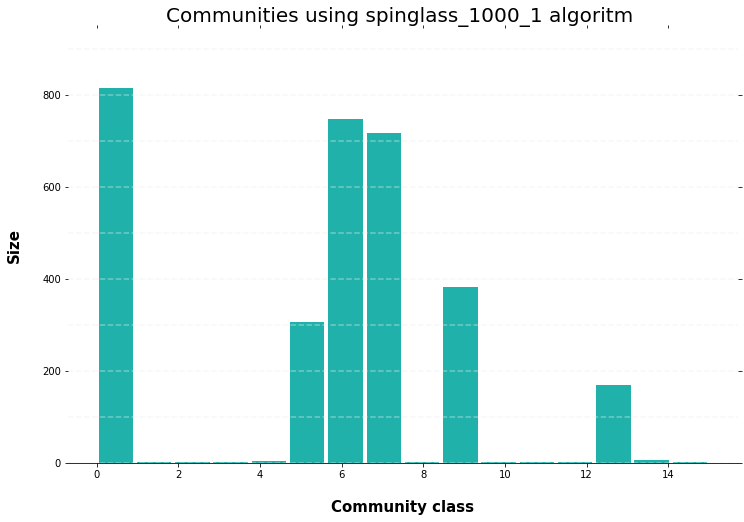

In [ ]:
spinglass_1_1=largest.community_spinglass(start_temp=1, stop_temp=1, cool_fact=0.99,)


Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15


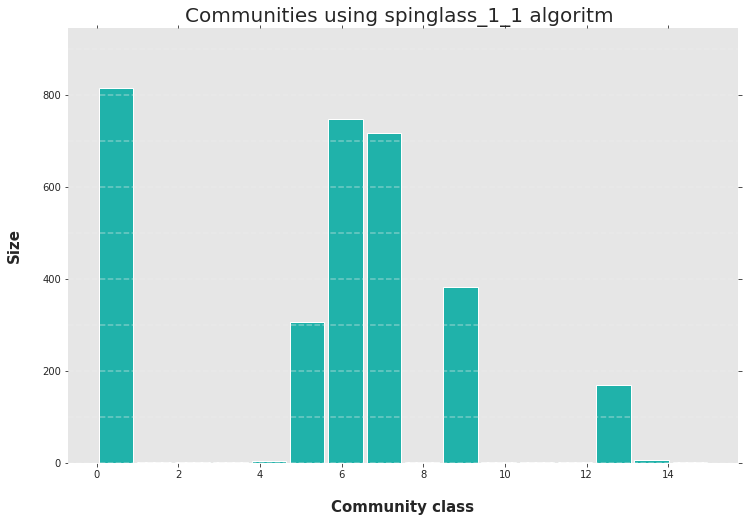

In [ ]:
Community_save(largest, spinglass_1_1, "spinglass_1_1")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18


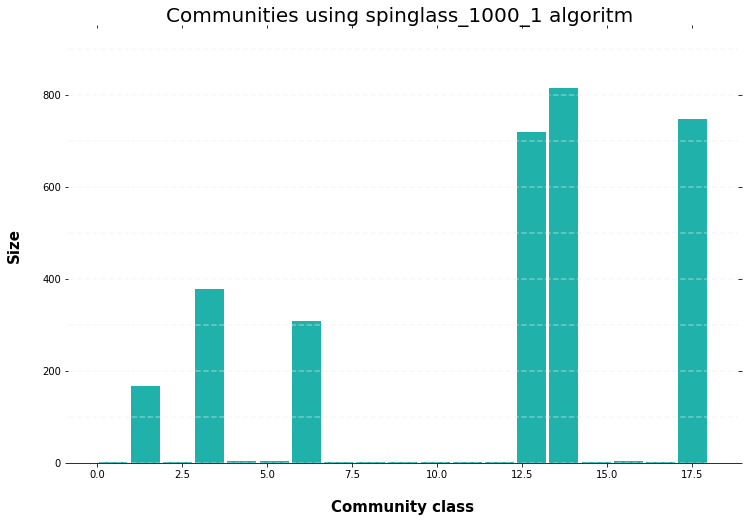

In [ ]:
spinglass_1000_1=largest.community_spinglass(start_temp=1000, stop_temp=1, cool_fact=0.99,)


Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18


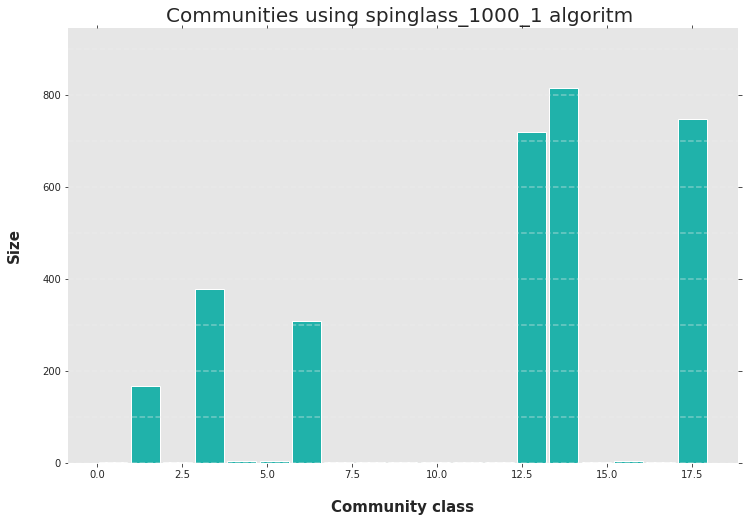

In [ ]:
Community_save(largest, spinglass_1000_1, "spinglass_1000_1")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24


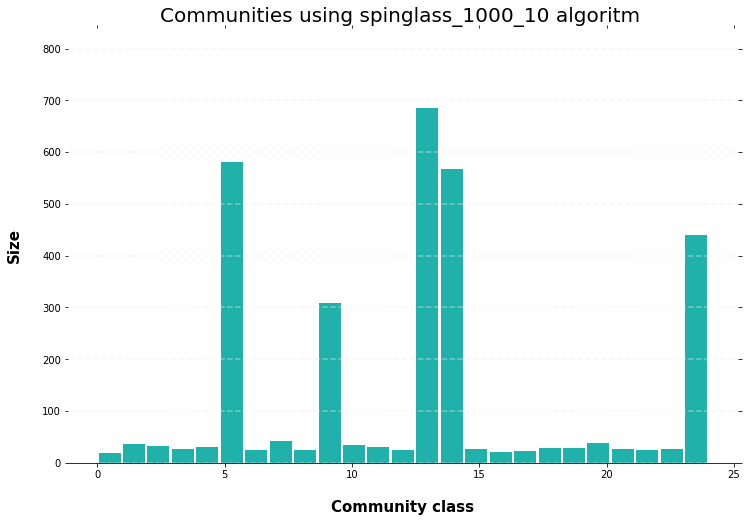

In [ ]:
spinglass_1000_10=largest.community_spinglass(start_temp=1000, stop_temp=10, cool_fact=0.99,)
Community_save(largest, spinglass_1000_10, "spinglass_1000_10")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24


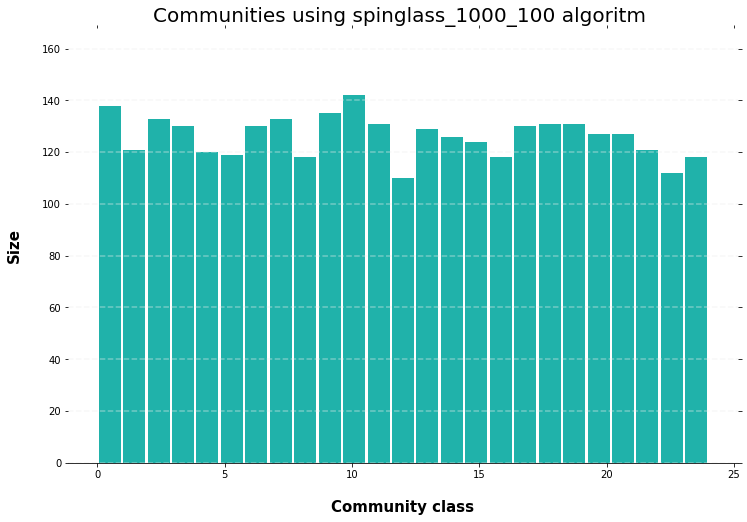

In [ ]:
spinglass_1000_100=largest.community_spinglass(start_temp=1000, stop_temp=100, cool_fact=0.99,)
Community_save(largest, spinglass_1000_100, "spinglass_1000_100")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24


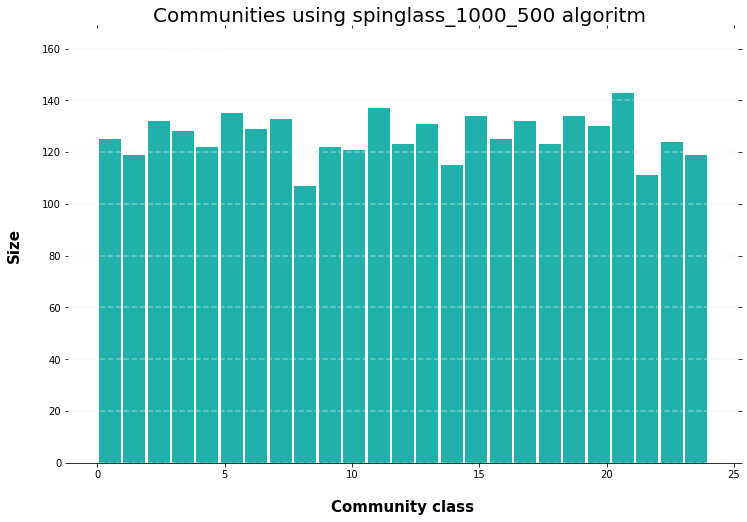

In [ ]:
spinglass_1000_500=largest.community_spinglass(start_temp=1000, stop_temp=500, cool_fact=0.99,)
Community_save(largest, spinglass_1000_500, "spinglass_1000_500")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20
Community =  21
Community =  22
Community =  23
Community =  24


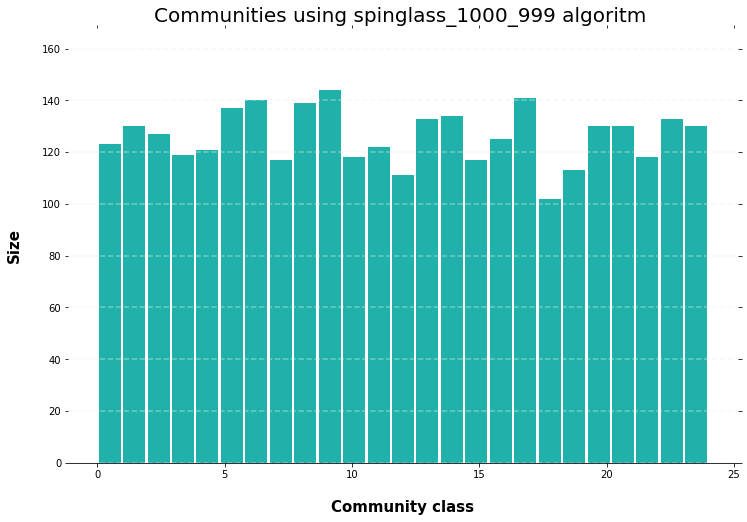

In [ ]:
spinglass_1000_999=largest.community_spinglass(start_temp=1000, stop_temp=999, cool_fact=0.99,)
Community_save(largest, spinglass_1000_999, "spinglass_1000_999")

keeping fixed stop temp


Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18


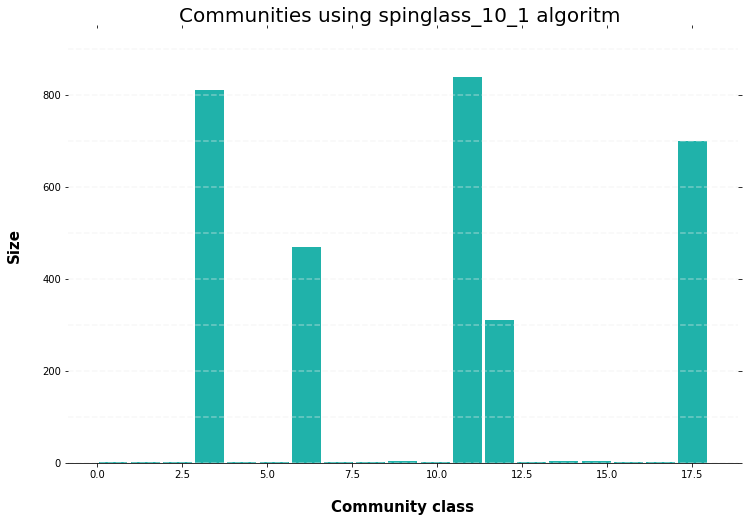

In [ ]:
spinglass_10_1=largest.community_spinglass(start_temp=10, stop_temp=1, cool_fact=0.99,)
Community_save(largest, spinglass_10_1, "spinglass_10_1")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19
Community =  20


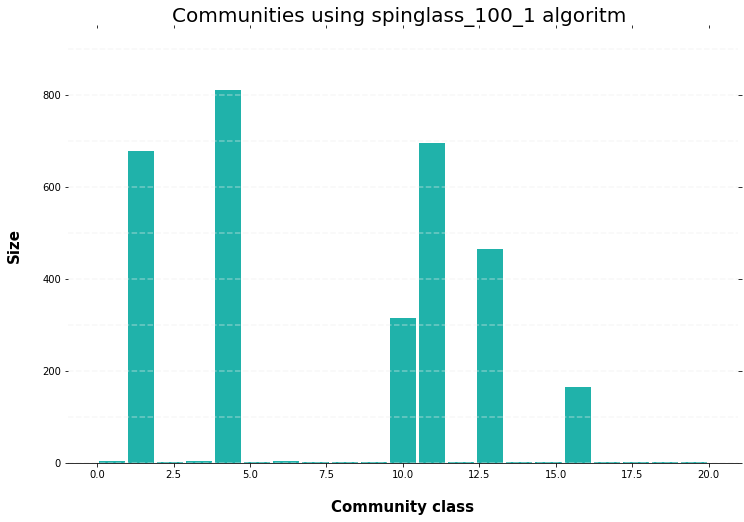

In [ ]:
spinglass_100_1=largest.community_spinglass(start_temp=100, stop_temp=1, cool_fact=0.99,)
Community_save(largest, spinglass_100_1, "spinglass_100_1")

Community =  0
Community =  1
Community =  2
Community =  3
Community =  4
Community =  5
Community =  6
Community =  7
Community =  8
Community =  9
Community =  10
Community =  11
Community =  12
Community =  13
Community =  14
Community =  15
Community =  16
Community =  17
Community =  18
Community =  19


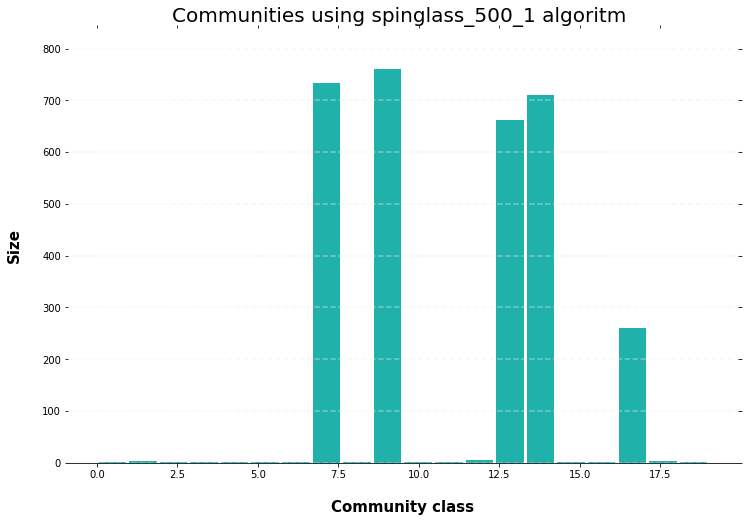

KeyboardInterrupt: ignored

In [ ]:
spinglass_500_1=largest.community_spinglass(start_temp=500, stop_temp=1, cool_fact=0.99,)
Community_save(largest, spinglass_500_1, "spinglass_500_1")

In [ ]:
spinglass_10000_1=largest.community_spinglass(start_temp=10000, stop_temp=1, cool_fact=0.99,)
Community_save(largest, spinglass_10000_1, "spinglass_10000_1")

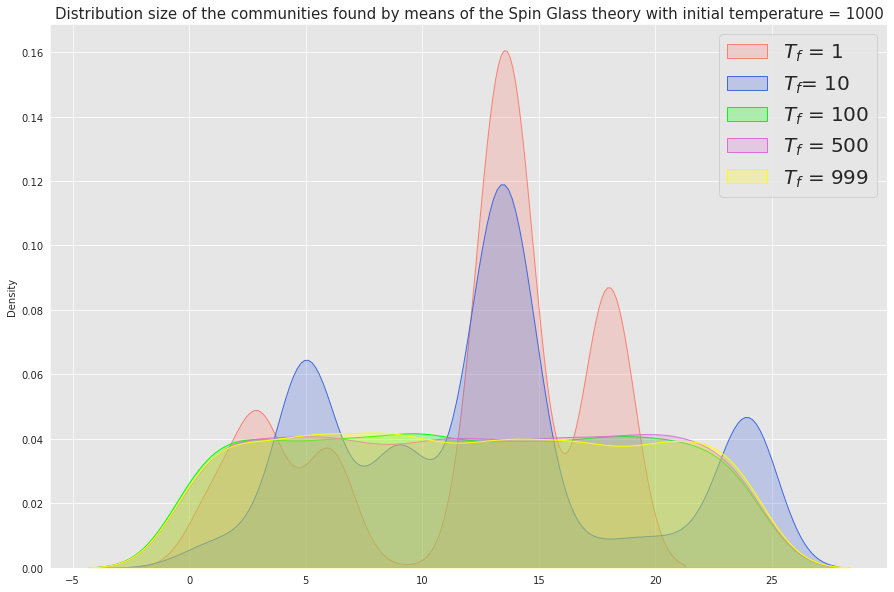

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.color_palette("pastel", as_cmap=True)
fig = plt.figure(figsize=(15,10))
sns.kdeplot(spinglass_1000_1.membership, shade=True, label = '$T_f$ = 1',  color = "salmon")
sns.kdeplot(spinglass_1000_10.membership, shade=True, label = '$T_f$= 10', color = "royalblue")
sns.kdeplot(spinglass_1000_100.membership, shade=True, label = '$T_f$ = 100',  color = "lime")
sns.kdeplot(spinglass_1000_500.membership, shade=True, label = '$T_f$ = 500',  color = "orchid")
sns.kdeplot(spinglass_1000_999.membership, shade=True, label = '$T_f$ = 999',  color = "yellow")
plt.title("Distribution size of the communities found by means of the Spin Glass theory with initial temperature = 1000", fontsize = 15)
plt.legend(fontsize = 20)

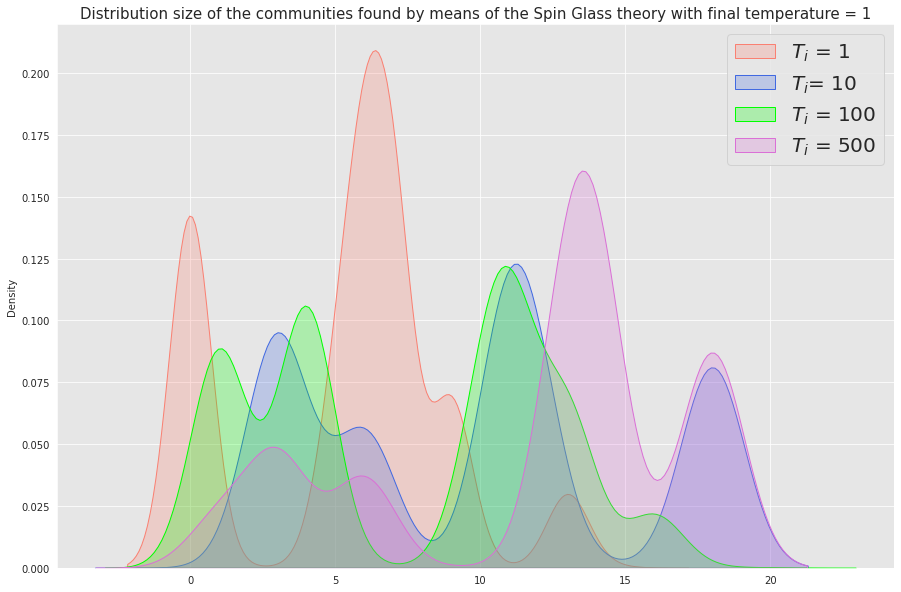

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.color_palette("pastel", as_cmap=True)
fig = plt.figure(figsize=(15,10))
sns.kdeplot(spinglass_1_1.membership, shade=True, label = '$T_i$ = 1',  color = "salmon")
sns.kdeplot(spinglass_10_1.membership, shade=True, label = '$T_i$= 10', color = "royalblue")
sns.kdeplot(spinglass_100_1.membership, shade=True, label = '$T_i$ = 100',  color = "lime")
sns.kdeplot(spinglass_1000_1.membership, shade=True, label = '$T_i$ = 500',  color = "orchid")
plt.title("Distribution size of the communities found by means of the Spin Glass theory with final temperature = 1", fontsize = 15)
plt.legend(fontsize = 20)

In [ ]:
largest.to_undirected()

In [ ]:
communities_tf = [spinglass_1000_0.membership, spinglass_1000_1.membership,spinglass_1000_2.membership, spinglass_1000_10.membership, spinglass_1000_100.membership, spinglass_1000_500.membership, spinglass_1000_999.membership]

In [ ]:
modularity_tf = []
for i in communities_tf:
  print(largest.modularity(i))
  modularity_tf.append(largest.modularity(i))

0.4679206667640925
0.45959217747317793
0.4588695163768997
0.4154646324863485
3.9152755811548094e-05
-0.0005312212510013813
-0.00019019473417207218


In [ ]:
tf = [0, 1, 2, 10, 100, 500, 999]

Text(0.5, 1.0, 'Modularity with fixed Final temperature ')

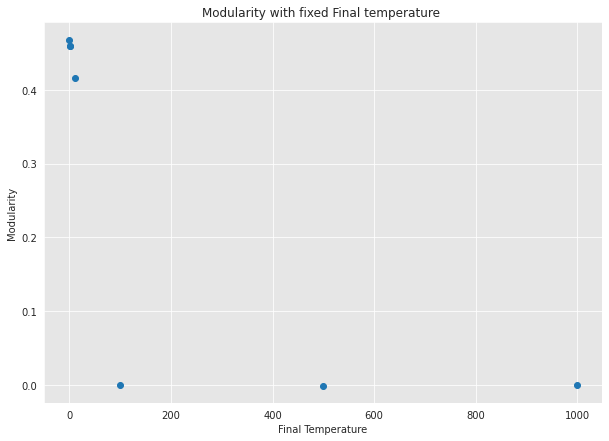

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(tf, modularity_tf)
plt.ylabel('Modularity')
plt.xlabel('Final Temperature')
plt.title('Modularity with fixed Final temperature ')

In [ ]:
communities_ti = [spinglass_1_1.membership, spinglass_10_1.membership, spinglass_100_1.membership, spinglass_1000_1.membership]

In [ ]:
modularity_ti = []
for i in communities_ti:
  print(largest.modularity(i))
  modularity_ti.append(largest.modularity(i))

0.45952306872544346
0.4623733592617107
0.46276805440904484
0.45959217747317793


In [ ]:
ti = [1, 10, 100, 1000]

Text(0.5, 1.0, 'Modularity with fixed final temperature ')

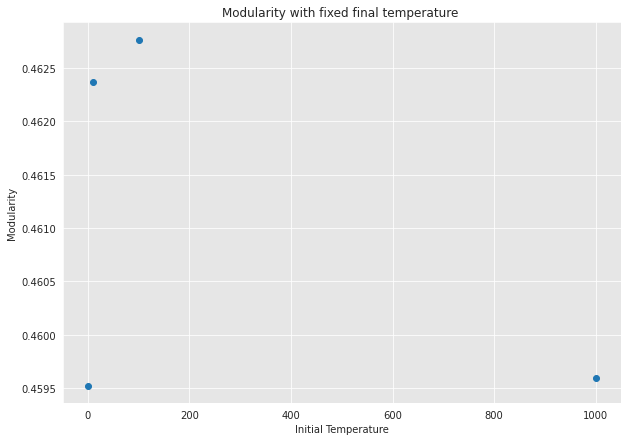

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(ti, modularity_ti)
plt.ylabel('Modularity')
plt.xlabel('Initial Temperature')
plt.title('Modularity with fixed final temperature ')

In [ ]:
!zip spinglass_temperature.zip Data/*.csv

updating: Data/spinglass_1000_1000.csv (deflated 62%)
updating: Data/spinglass_1000_10010.csv (deflated 68%)
updating: Data/spinglass_1000_10011.csv (deflated 67%)
updating: Data/spinglass_1000_10012.csv (deflated 66%)
updating: Data/spinglass_1000_10013.csv (deflated 66%)
updating: Data/spinglass_1000_10014.csv (deflated 66%)
updating: Data/spinglass_1000_10015.csv (deflated 67%)
updating: Data/spinglass_1000_10016.csv (deflated 66%)
updating: Data/spinglass_1000_10017.csv (deflated 67%)
updating: Data/spinglass_1000_10018.csv (deflated 67%)
updating: Data/spinglass_1000_10019.csv (deflated 67%)
updating: Data/spinglass_1000_1001.csv (deflated 62%)
updating: Data/spinglass_1000_10020.csv (deflated 67%)
updating: Data/spinglass_1000_10021.csv (deflated 66%)
updating: Data/spinglass_1000_10022.csv (deflated 65%)
updating: Data/spinglass_1000_10023.csv (deflated 67%)
updating: Data/spinglass_1000_10024.csv (deflated 66%)
updating: Data/spinglass_1000_1002.csv (deflated 62%)
updating: Dat